<a href="https://colab.research.google.com/github/asalimw/testing/blob/master/Lect7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean of rolling 1 die = 2.5000920497422032, Std = 1.4434674064137751
Mean of rolling 50 dice = 2.4980116326400523, Std = 0.20260406693227545


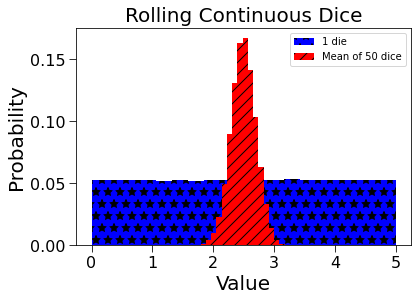

In [2]:
import random, pylab, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std
    
#Test CLT
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random() 
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend,
               weights = [1/len(means)]*len(means),
               hatch = style)
    return getMeanAndStd(means)
 
mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()


In [3]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 2*(inCircle/float(numNeedles))
    
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles,
                              numTrials)
        numNeedles *= 2
    return curEst

random.seed(0)
estPi(0.005, 100)

Est. = 1.5742200000000006, Std. dev. = 0.023943, Needles = 1000
Est. = 1.5695899999999994, Std. dev. = 0.017748, Needles = 2000
Est. = 1.5705399999999998, Std. dev. = 0.013565, Needles = 4000
Est. = 1.5707175, Std. dev. = 0.008402, Needles = 8000
Est. = 1.5706775, Std. dev. = 0.00685, Needles = 16000
Est. = 1.5706568750000003, Std. dev. = 0.004238, Needles = 32000
Est. = 1.5705859374999995, Std. dev. = 0.003514, Needles = 64000
Est. = 1.5707948437499997, Std. dev. = 0.002017, Needles = 128000


1.5707948437499997